In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/wine.csv')
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target  
0                          3.92     1065       0  
1                          3.40     1050       0  
2                          3.17     1185       0  
3                          3.45     1480       0  
4                          2.93      735       0

In [2]:
df.shape

(178, 14)

In [3]:
df['Target'].value_counts()

Target
1    71
0    59
2    48
Name: count, dtype: int64

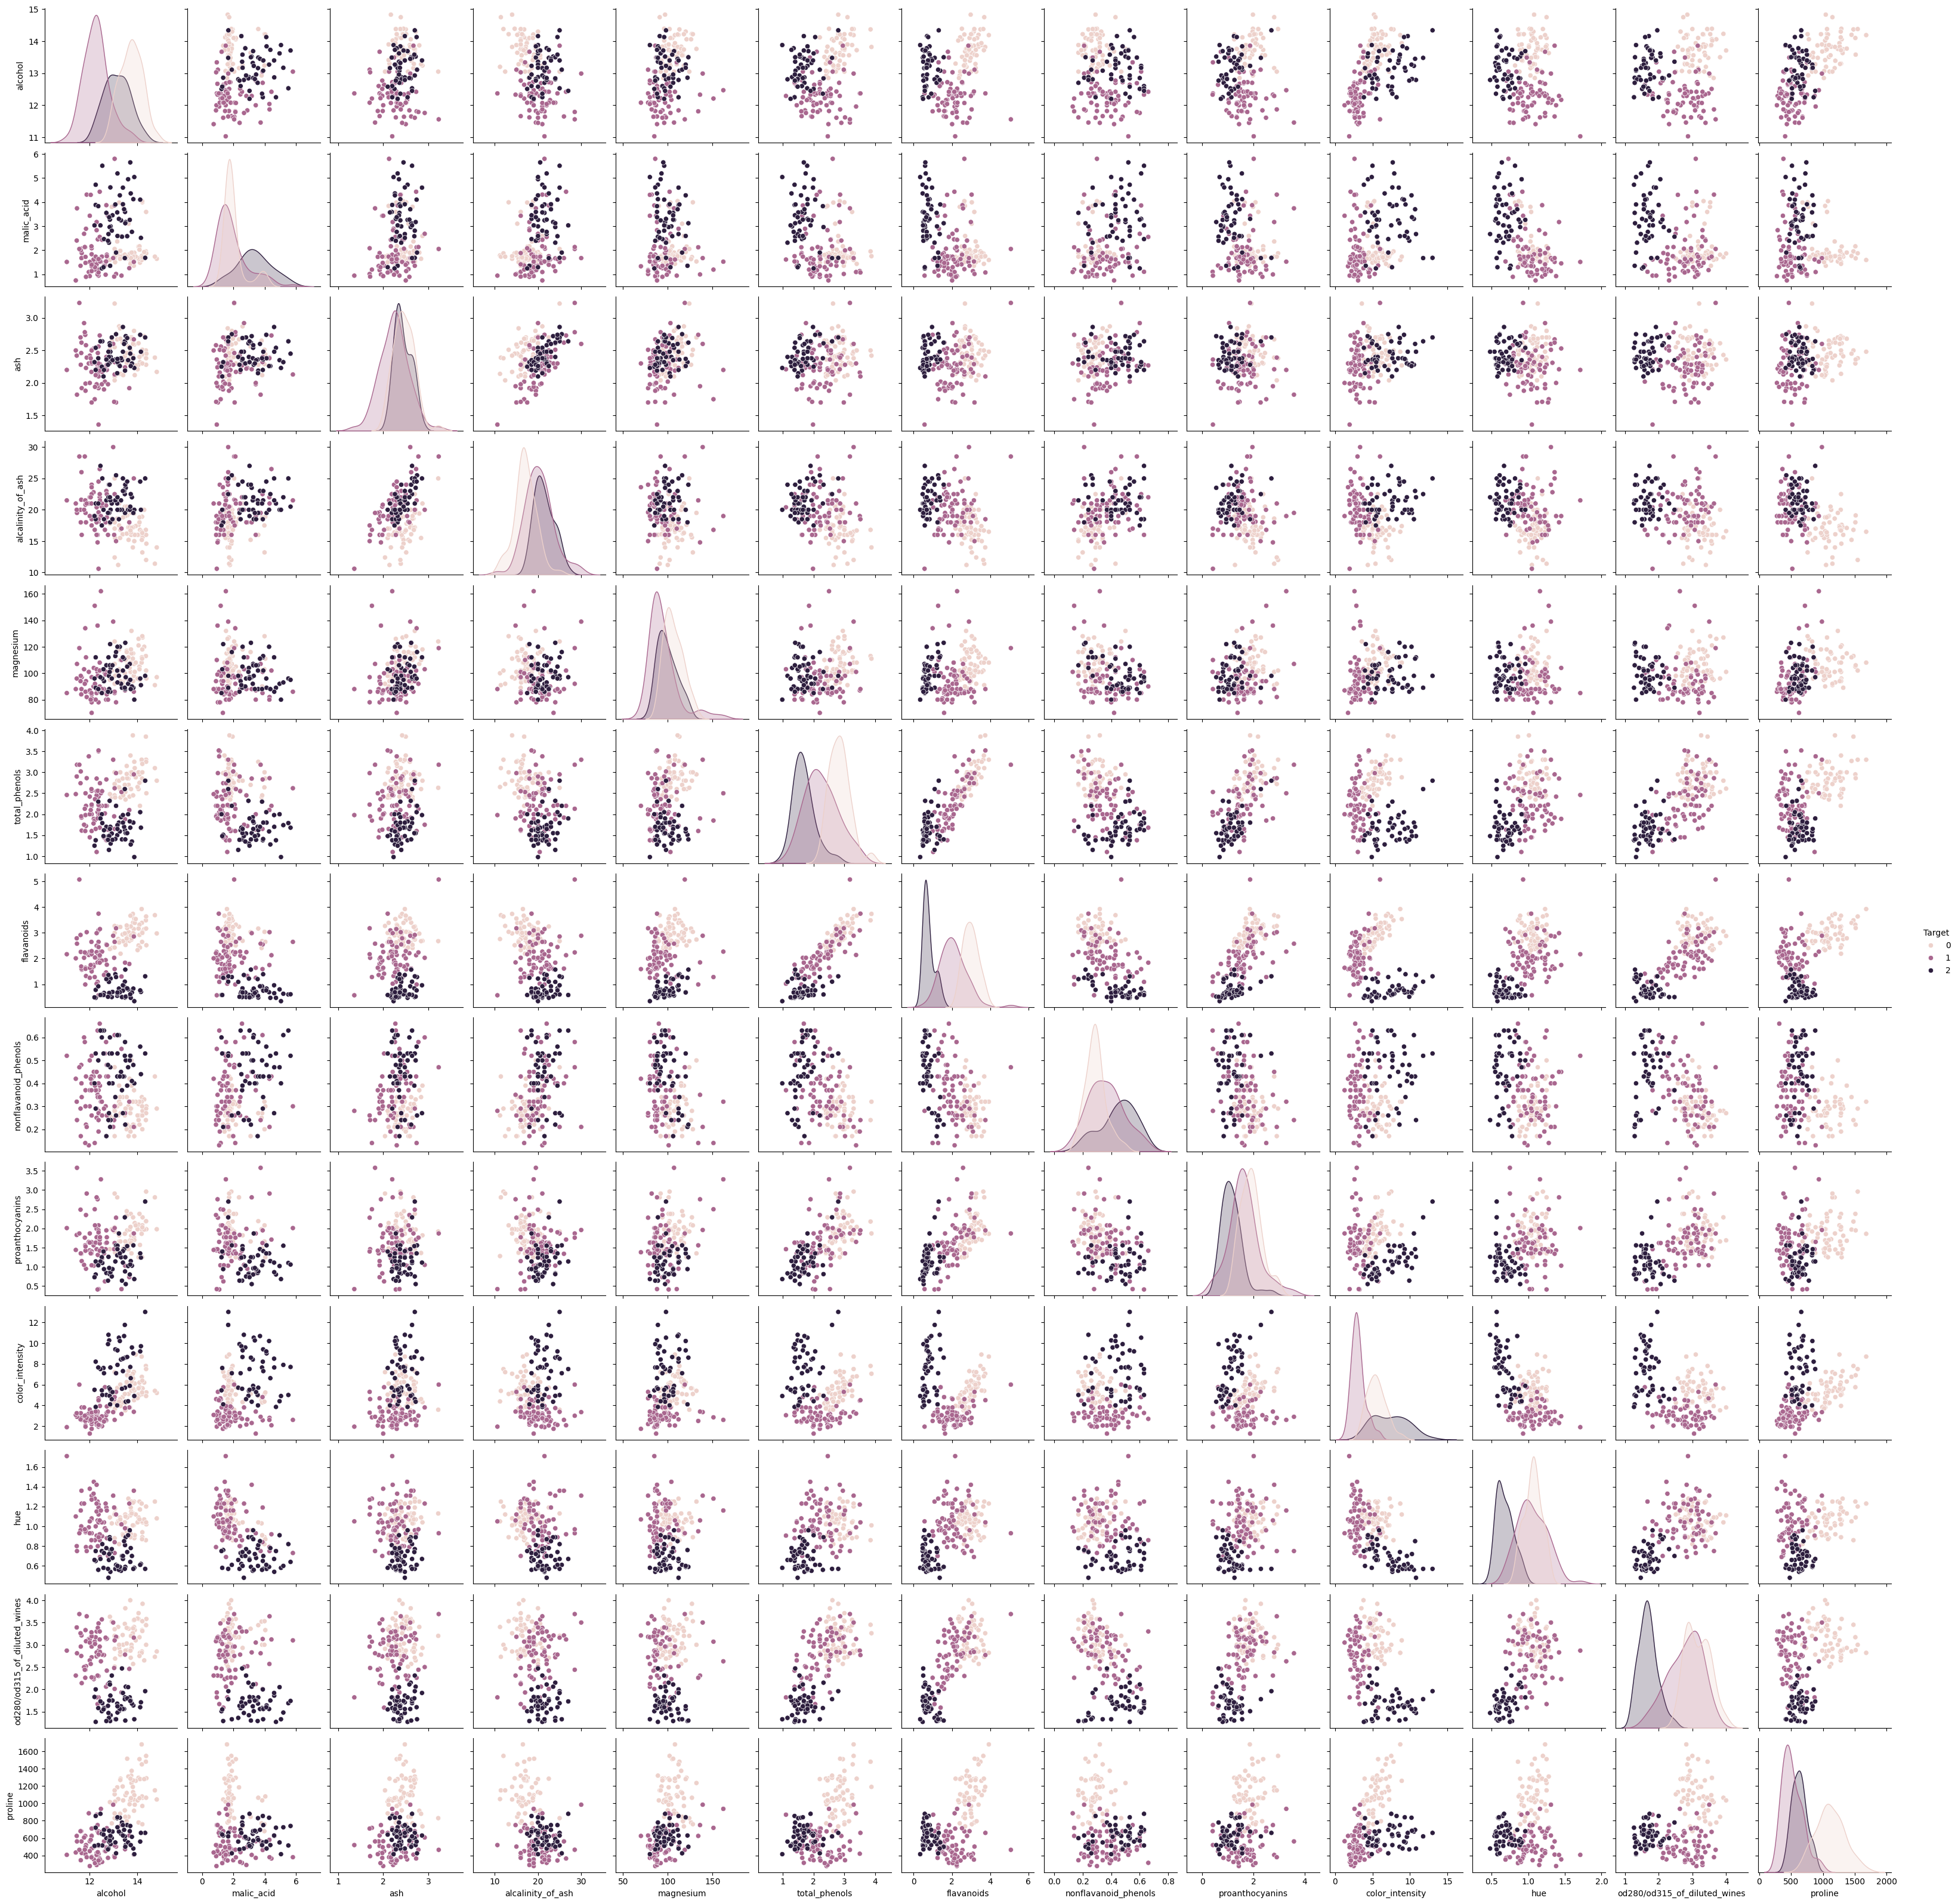

In [4]:
sns.pairplot(df , hue='Target')

In [5]:
#define features and labels
X = df.drop('Target', axis='columns')
Y = df['Target']

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Spliting data into train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Define model to be trained
#model1 = DecisionTreeClassifier(max_depth=3)
#model1 = DecisionTreeClassifier(max_leaf_nodes=3)
model1 = DecisionTreeClassifier(min_samples_leaf=3)

#Train your model
model1.fit(X_train, Y_train)

#Predictions made on tarin & test data
yTrainPred = model1.predict(X_train)
yTestPred = model1.predict(X_test)

#Accuracy
print("Accuracy on training data : ", accuracy_score(Y_train, yTrainPred))
print("Accuracy on test data : ", accuracy_score(Y_test, yTestPred))

Accuracy on training data :  0.9859154929577465
Accuracy on test data :  0.9722222222222222


In [7]:
print(X_train.shape)
print(Y_train.value_counts())

(142, 13)
Target
1    55
0    45
2    42
Name: count, dtype: int64


[Text(0.4444444444444444, 0.9, 'color_intensity <= 3.46\ngini = 0.662\nsamples = 142\nvalue = [45, 55, 42]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'flavanoids <= 2.11\ngini = 0.58\nsamples = 96\nvalue = [45, 9, 42]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'hue <= 0.97\ngini = 0.245\nsamples = 49\nvalue = [0, 7, 42]'),
 Text(0.2222222222222222, 0.3, 'flavanoids <= 1.35\ngini = 0.045\nsamples = 43\nvalue = [0, 1, 42]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.7777777777777778, 0.5, 'alcohol <= 12.89\ngini = 0.081\nsamples = 47\nvalue = [45, 2, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.88888888888888

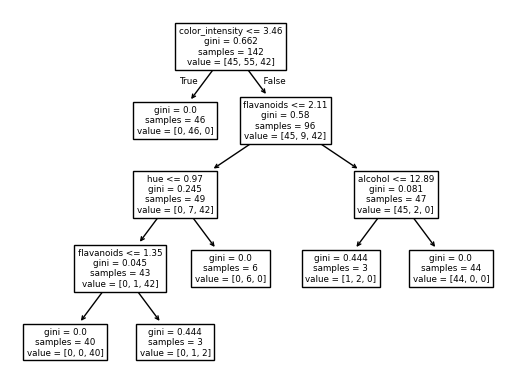

In [8]:
#Create Decision Tree
from sklearn.tree import plot_tree
plot_tree(model1 , feature_names=X.columns)

In [9]:
#gini_index = 1 - (p(0)**2 + p(1)**2 + ..... + p(n)**2)

#Gini Index of Root Node
gi_1 = 1 - ((45/142)**2 + (55/142)**2 + (42/142)**2)
print(gi_1)

0.6620710176552271


In [10]:
gi_2a = 1 - ((46/46)**2)
print(gi_2a)

gi_2b = 1 - ((45/96)**2 + (9/96)**2 + (42/96)**2)
print(gi_2b)

0.0
0.580078125


In [11]:
information_gain1 = gi_1 - (gi_2a + gi_2b)
print(information_gain1)


0.08199289265522713


In [12]:
gi_3a = 1 - ((7/49)**2 + (42/49)**2)
print(gi_3a)

gi_3b = 1 - ((45/47)**2 + (2/47)**2)
print(gi_3b)

0.24489795918367352
0.08148483476686263


In [13]:
information_gain2 = gi_2b - (gi_3a + gi_3b)
print(information_gain2)

0.25369533104946385


In [14]:
gi4la = 1 - ((1/43)**2 + (42/43)**2)
print(gi4la)

gi4lb = 1 - ((6/6)**2)
print(gi4lb)

print("=============================")

gi4ra = 1 - ((2/2)**2)
print(gi4ra)

gi4rb = 1 - ((45/45)**2)
print(gi4rb)

0.045429962141698255
0.0
0.0
0.0


In [15]:
information_gain3 = gi_3a - (gi4la + gi4lb)
print(information_gain3)

0.19946799704197526


In [16]:
information_gain4 = gi_3b - (gi4ra + gi4rb)
print(information_gain4)

0.08148483476686263


**One more classification model using Decision Tree**|

In [17]:
df_loan = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Loan%20Approval%20Prediction.csv')
df_loan.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [18]:
df_loan1 = df_loan.drop('Loan_ID', axis='columns')
df_loan1.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [19]:
df_loan1['ApplicantIncome'] = df_loan1['ApplicantIncome'] + df_loan1['CoapplicantIncome']
df_loan1 = df_loan1.drop('CoapplicantIncome', axis='columns')
df_loan1.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No           5849.0   
1   Male     Yes          1      Graduate            No           6091.0   
2   Male     Yes          0      Graduate           Yes           3000.0   
3   Male     Yes          0  Not Graduate            No           4941.0   
4   Male      No          0      Graduate            No           6000.0   

   LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  
0         NaN             360.0             1.0         Urban           Y  
1       128.0             360.0             1.0         Rural           N  
2        66.0             360.0             1.0         Urban           Y  
3       120.0             360.0             1.0         Urban           Y  
4       141.0             360.0             1.0         Urban           Y

In [20]:
df_loan1.isna().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df_loan1.nunique()

Gender                2
Married               2
Dependents            4
Education             2
Self_Employed         2
ApplicantIncome     554
LoanAmount          203
Loan_Amount_Term     10
Credit_History        2
Property_Area         3
Loan_Status           2
dtype: int64

In [22]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History' ,
                       'Property_Area' , 'Loan_Status']

non_categorical_columns = ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#fill null values with mode for categorical columns
#df_loan1['Gender'].mode()[0]

for col in categorical_columns:
    df_loan1[col] = df_loan1[col].fillna(df_loan1[col].mode()[0])


#fill null values with median value in non-categorical columns
#df_loan1['LoanAmount'].median()

for col in non_categorical_columns:
    df_loan1[col] = df_loan1[col].fillna(df_loan1[col].median())

In [23]:
df_loan1.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [24]:
df_loan1.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No           5849.0   
1   Male     Yes          1      Graduate            No           6091.0   
2   Male     Yes          0      Graduate           Yes           3000.0   
3   Male     Yes          0  Not Graduate            No           4941.0   
4   Male      No          0      Graduate            No           6000.0   

   LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  
0       128.0             360.0             1.0         Urban           Y  
1       128.0             360.0             1.0         Rural           N  
2        66.0             360.0             1.0         Urban           Y  
3       120.0             360.0             1.0         Urban           Y  
4       141.0             360.0             1.0         Urban           Y

In [25]:
df_loan1.dtypes


Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome     float64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
dtype: object

In [26]:
df_loan1.nunique()

Gender                2
Married               2
Dependents            4
Education             2
Self_Employed         2
ApplicantIncome     554
LoanAmount          203
Loan_Amount_Term     10
Credit_History        2
Property_Area         3
Loan_Status           2
dtype: int64

In [27]:
df_loan1['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
ordinal_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status']

nominal_column = ['property_area']

#label encoding for ordinal_columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ordinal_columns:
    df_loan1[col] = le.fit_transform(df_loan1[col])

In [29]:
#One hot encoding for nominal columns

df_loan1 = pd.get_dummies(df_loan1 , columns = ['Property_Area'])

In [30]:
#Sepearte features and labels
X = df_loan1.drop('Loan_Status', axis='columns')
Y = df_loan1['Loan_Status']

#Split train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state = 0)

#Data scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

#Build a decision tree model
model2 = DecisionTreeClassifier(max_depth=3)

#Train the model
model2.fit(X_trainScaled, Y_train)

#Predictions
yTrainPred = model2.predict(X_trainScaled)
yTestPred = model2.predict(X_testScaled)

#Accuracy
print("Accuracy on training data : ", accuracy_score(Y_train, yTrainPred))
print("Accuracy on test data : ", accuracy_score(Y_test, yTestPred))

Accuracy on training data :  0.8187372708757638
Accuracy on test data :  0.8211382113821138


#**Cross validation**

In [32]:
train_data_accuracy = []
test_data_accuracy = []

for i in range(0,10):
  #Split train & test
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state = i)

  scaler = MinMaxScaler()

  X_trainScaled = scaler.fit_transform(X_train)
  X_testScaled = scaler.transform(X_test)

  #Build a decision tree model
  model3 = DecisionTreeClassifier(max_depth=3)

  #Train the model
  model3.fit(X_trainScaled, Y_train)

  #Predictions
  yTrainPred = model3.predict(X_trainScaled)
  yTestPred = model3.predict(X_testScaled)

  #Accuracy
  print("Accuracy on training data : ", accuracy_score(Y_train, yTrainPred))
  train_data_accuracy.append(accuracy_score(Y_train, yTrainPred))

  print("Accuracy on test data : ", accuracy_score(Y_test, yTestPred))
  test_data_accuracy.append(accuracy_score(Y_test, yTestPred))
  print()

Accuracy on training data :  0.8187372708757638
Accuracy on test data :  0.8211382113821138

Accuracy on training data :  0.8268839103869654
Accuracy on test data :  0.8048780487804879

Accuracy on training data :  0.8431771894093686
Accuracy on test data :  0.7317073170731707

Accuracy on training data :  0.8105906313645621
Accuracy on test data :  0.8455284552845529

Accuracy on training data :  0.8228105906313645
Accuracy on test data :  0.7804878048780488

Accuracy on training data :  0.8228105906313645
Accuracy on test data :  0.7886178861788617

Accuracy on training data :  0.814663951120163
Accuracy on test data :  0.8455284552845529

Accuracy on training data :  0.8187372708757638
Accuracy on test data :  0.8292682926829268

Accuracy on training data :  0.8105906313645621
Accuracy on test data :  0.8699186991869918

Accuracy on training data :  0.8370672097759674
Accuracy on test data :  0.7560975609756098



In [33]:
average_train_data_accuracy = sum(train_data_accuracy)/len(train_data_accuracy)
average_test_data_accuracy = sum(test_data_accuracy)/len(test_data_accuracy)

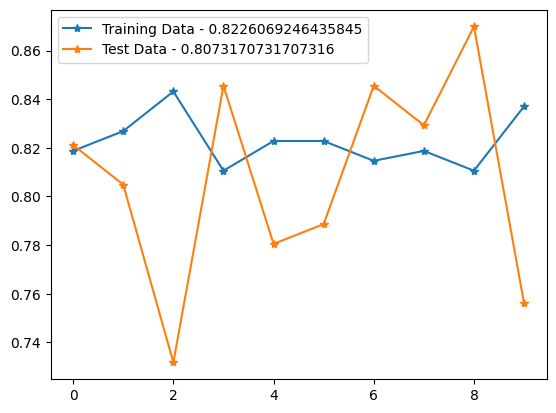

In [34]:
plt.plot(range(0,10) , train_data_accuracy ,
         label = f'Training Data - {average_train_data_accuracy}' , marker = '*')
plt.plot(range(0,10) , test_data_accuracy ,
         label = f'Test Data - {average_test_data_accuracy}' , marker = '*')
plt.legend()
plt.show()

In [35]:
#cross validation
from sklearn.model_selection import cross_val_score

model4 = DecisionTreeClassifier(max_depth=3)
model_accuracy = cross_val_score(model3 , X_trainScaled , Y_train , cv=10)
print(model_accuracy)
print(model_accuracy.mean())

[0.78       0.83673469 0.85714286 0.85714286 0.83673469 0.83673469
 0.83673469 0.7755102  0.7755102  0.81632653]
0.8208571428571428


In [36]:
#Grid Search CV for hyperparameter tuning

from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : [2,3],
              'max_leaf_nodes' : [2,3,4,5,6],
              'min_samples_split' : [2,3,4,5,6]}

grid = GridSearchCV(model3 , param_grid , cv=10)      #model, parameter grid, number of cross validation
grid.fit(X , Y)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.8095716552088842


In [37]:
model4 = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, min_samples_split=2)
model4.fit(X_trainScaled , Y_train)

#Evaluation
print("Training Data accuracy" , model4.score(X_trainScaled , Y_train))
print("Test Data accuracy" , model4.score(X_testScaled , Y_test))

Training Data accuracy 0.8228105906313645
Test Data accuracy 0.7560975609756098


In [38]:
#Make prediction
print(model2.predict(scaler.transform([X_test.values[4]])))

[0]


C:\Users\gk154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [39]:
Y_test.values[4]

0

In [40]:
#Visualise tree  - model2

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,7))
plot_tree(model2 , feature_names=X.columns)

plt.show()


**Random Forest Classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(max_depth=3 , n_estimators=100)
model5.fit(X_trainScaled , Y_train)

RandomForestClassifier(max_depth=3)

In [43]:
print(model5.score(X_trainScaled , Y_train))
print(model5.score(X_testScaled , Y_test))

0.835030549898167
0.7560975609756098


In [44]:
train_acc = []
test_acc = []
for i in range(1,15):
  model6 = RandomForestClassifier(max_depth=i , n_estimators=100)
  model6.fit(X_trainScaled , Y_train)
  train_acc.append(model6.score(X_trainScaled , Y_train))
  test_acc.append(model6.score(X_testScaled , Y_test))

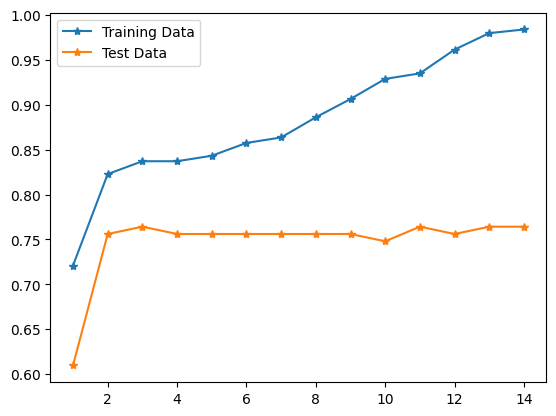

In [45]:
plt.plot(range(1,15) , train_acc , label = 'Training Data' , marker = '*')
plt.plot(range(1,15) , test_acc , label = 'Test Data' , marker = '*')
plt.legend()
plt.show()

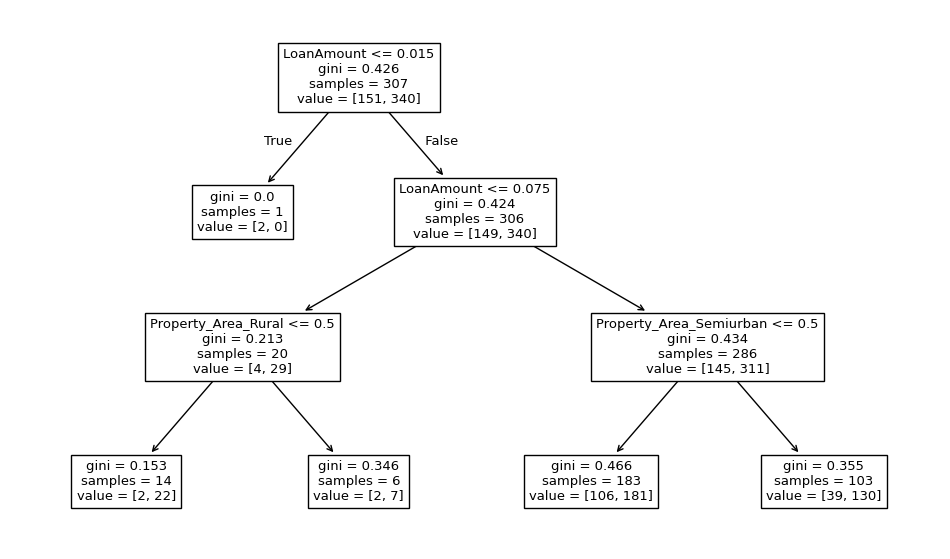

In [46]:
#Visualise tree  - model2

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,7))
plot_tree(model5[99] , feature_names=X.columns)

plt.show()